# Import Essential Libraries

In [1]:
# python visualization libraries
import matplotlib.pyplot as plt
import matplotlib as mpl
# from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
%matplotlib inline

import pandas as pd
import numpy as np

# Using plotly.express
import plotly.express as px
import plotly.graph_objects as go

# Mount Google Drive

In [2]:
import os

from google.colab import drive
drive.mount('/content/drive')

# edit this path if needed
my_path = '/content/drive/My Drive/Colab Notebooks/'

# change to this path
os.chdir(my_path)

# verify present working directory. It should be identical to 'my_path'
!pwd

Mounted at /content/drive
/content/drive/My Drive/Colab Notebooks


In [4]:
df_stock = pd.read_csv('data/AAPL.csv', parse_dates=True, index_col = "Date")


# adding Date as column and index
df_stock['Date'] = df_stock.index

df = df_stock

# adding daily interval
df.index = pd.DatetimeIndex(df.index).to_period('D')

# display
display(df_stock.head())
display(df_stock.tail())

Open      High       Low     Close  Adj Close     Volume  \
Date                                                                       
2010-04-19  8.822500  8.853214  8.634643  8.823929   7.555702  566924400   
2010-04-20  8.876429  8.901786  8.677143  8.735357   7.479861  738326400   
2010-04-21  9.242857  9.294643  9.133214  9.257857   7.927264  982391200   
2010-04-22  9.222857  9.526786  9.150000  9.516786   8.148975  793424800   
2010-04-23  9.571071  9.720714  9.535714  9.672500   8.282313  796955600   

                 Date  
Date                   
2010-04-19 2010-04-19  
2010-04-20 2010-04-20  
2010-04-21 2010-04-21  
2010-04-22 2010-04-22  
2010-04-23 2010-04-23

Open        High         Low       Close   Adj Close  \
Date                                                                     
2022-04-08  171.779999  171.779999  169.199997  170.089996  170.089996   
2022-04-11  168.710007  169.029999  165.500000  165.750000  165.750000   
2022-04-12  168.020004  169.869995  166.639999  167.660004  167.660004   
2022-04-13  167.389999  171.039993  166.770004  170.399994  170.399994   
2022-04-14  170.619995  171.270004  165.039993  165.289993  165.289993   

              Volume       Date  
Date                             
2022-04-08  76515900 2022-04-08  
2022-04-11  72246700 2022-04-11  
2022-04-12  79265200 2022-04-12  
2022-04-13  70618900 2022-04-13  
2022-04-14  75237500 2022-04-14

In [5]:
fig = px.line( # you can also use 'px.area'
    data_frame = df_stock, 
    x=  df.Date, # changed from column 'Date' to index Date, 
    y='High', title='Stock price (High) with Rangeslider and RangeSliders'
)
df_stock.index
# Add rangeslider
fig.update_xaxes(        
    # add attribute rangeslider_visible (doc: https://plotly.com/python/reference/layout/xaxis/#layout-xaxis-rangeselector)    
    rangeslider_visible = True,

    # next, add rangeselector with rangeselector_buttons (doc: https://plotly.com/python/reference/layout/xaxis/#layout-xaxis-rangeselector-buttons)
    rangeselector_buttons = list(
        # list begin
        [          
         # Each dictionary item below indicates a filter button. Dictionary keys (e.g., count, label, step, stepmode) are described in rangeselector_buttons's documnetation
          dict(count = 3,  label = "1Q", step = "day", stepmode = "backward"), # button 1
          dict(count = 4,  label = "2Q", step = "day", stepmode = "backward"), # button 2
          dict(count = 8,  label = "3Q", step = "day", stepmode = "backward"), # button 3
          dict(count = 12, label = "4Q", step = "day", stepmode = "backward"), # button 4
          dict(step="all")                                                       # button 5
        ] 
        # list end    
    )
)

# show figure
fig.show()

# Time Series Analysis


5 daya moving average plot of High stock price

In [6]:
# window size or lag = 5
window_size = 5
df_rolling = df['High'].rolling(window = window_size).mean()
display(df_rolling.head())

Date
2010-04-19         NaN
2010-04-20         NaN
2010-04-21         NaN
2010-04-22         NaN
2010-04-23    9.259429
Freq: D, Name: High, dtype: float64

In [7]:
# replace missing values
df_rolling = df_rolling.fillna(df_rolling.mean())
display(df_rolling.head())

Date
2010-04-19    46.967379
2010-04-20    46.967379
2010-04-21    46.967379
2010-04-22    46.967379
2010-04-23     9.259429
Freq: D, Name: High, dtype: float64

In [8]:
fig = px.line( # you can also use 'px.area'
    data_frame = df_rolling, 
    x=  df.Date, # changed from column 'Date' to index Date, 
    y='High', title='5 day moving average stock price (High) with Rangeslider and RangeSliders'
)
df_stock.index
# Add rangeslider
fig.update_xaxes(        
    # add attribute rangeslider_visible (doc: https://plotly.com/python/reference/layout/xaxis/#layout-xaxis-rangeselector)    
    rangeslider_visible = True,

    # next, add rangeselector with rangeselector_buttons (doc: https://plotly.com/python/reference/layout/xaxis/#layout-xaxis-rangeselector-buttons)
    rangeselector_buttons = list(
        # list begin
        [          
         # Each dictionary item below indicates a filter button. Dictionary keys (e.g., count, label, step, stepmode) are described in rangeselector_buttons's documnetation
          dict(count = 3,  label = "1Q", step = "day", stepmode = "backward"), # button 1
          dict(count = 4,  label = "2Q", step = "day", stepmode = "backward"), # button 2
          dict(count = 8,  label = "3Q", step = "day", stepmode = "backward"), # button 3
          dict(count = 12, label = "4Q", step = "day", stepmode = "backward"), # button 4
          dict(step="all")                                                       # button 5
        ] 
        # list end    
    )
)

# show figure
fig.show()

As it can be seen above, after performing 5 day moving average the time series get smoother compared to the original time series due to the fact that the values are getting averaged over 5 day interval each time.

**SECTION C**\
creating AR(1) process

In [9]:
from statsmodels.tsa.stattools import  pacf
from statsmodels.graphics import tsaplots # time series plots
from statsmodels.tsa.stattools import  acf
from numpy.random import default_rng
rng = default_rng(12345)


n_points = 200
ar_factor = 0.5
w_std = 1.0

X_t = np.zeros(n_points)

for i in range(1, n_points):
  X_t[i] = ar_factor * X_t[i-1] + rng.normal(0, w_std)

# create a data-frame
dates = pd.date_range(start='2020-06-20', periods=n_points, freq='D')

df_simulated = pd.DataFrame(
  {'Date': dates, 
   'X': X_t
  },
  index = dates
)

display(df_simulated)

# visualiza
fig = px.line(data_frame = df_simulated, y = 'X', markers=True)

# Add rangeslider
fig.update_xaxes(
  rangeslider_visible = True 
)

fig.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



Date         X
2020-06-20 2020-06-20  0.000000
2020-06-21 2020-06-21 -1.423825
2020-06-22 2020-06-22  0.551816
2020-06-23 2020-06-23 -0.594754
2020-06-24 2020-06-24 -0.556550
...               ...       ...
2021-01-01 2021-01-01  0.035000
2021-01-02 2021-01-02  0.703682
2021-01-03 2021-01-03  1.566846
2021-01-04 2021-01-04  0.999482
2021-01-05 2021-01-05 -0.465082

[200 rows x 2 columns]

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning:

fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.



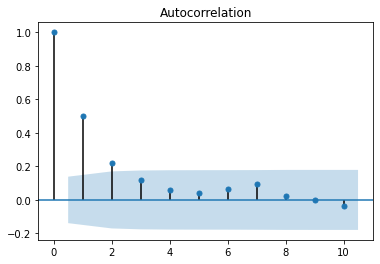

[ 1.          0.50296539  0.22091127  0.11686122  0.06040308  0.0382703
  0.06281649  0.09207996  0.02628865  0.00176565 -0.03775726]


In [10]:
nlag = 10
result = acf(x=df_simulated['X'],  nlags = nlag)

fig = tsaplots.plot_acf(df_simulated['X'], lags = nlag)
plt.show()
print(result)

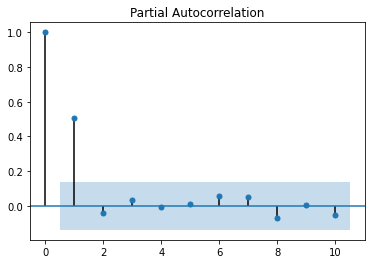

[ 1.          0.50549285 -0.04349406  0.03085008 -0.00452864  0.01164205
  0.05414861  0.0525279  -0.06836765  0.00549386 -0.05423122]


In [11]:
from statsmodels.tsa.stattools import  pacf

result = pacf(x=df_simulated['X'],  nlags = nlag)

fig = tsaplots.plot_pacf(df_simulated['X'], lags = 10)
plt.show()
print(result)

As it can be seen above, with factor of 0.5 we get the same acf and pacf. Since our model is lag 1 model AR(1) the impact of lag 1 in time series is statistically significant. As it can bee seen above, the lag 1 exceeds the significance band in both acf and pacf while other lags remain within the band (blue shaded area)